# Students Performance In Exams

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

## Import Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing My Dataset

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
## To see the first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# To see the last 5 rows
df.tail() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
## To get datatypes
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
## Descriptive Statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## To get the column names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
## To get the shape
df.shape

(1000, 8)

In [10]:
## To get the unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# To get the unique values in gender column
df['gender'].unique() 

array(['female', 'male'], dtype=object)

## Check for missing values

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Exploratory Data Analysis

### Gender

In [13]:
gender=df.groupby(['gender'])[['math score','reading score','writing score']].mean()

In [14]:
gender

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


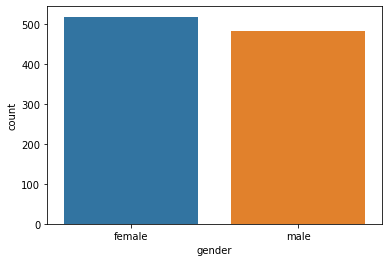

In [15]:
sns.countplot(x='gender',data=df)
plt.show()

In [16]:
#gender=gender.to_frame()

gender=gender.reset_index()
gender

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


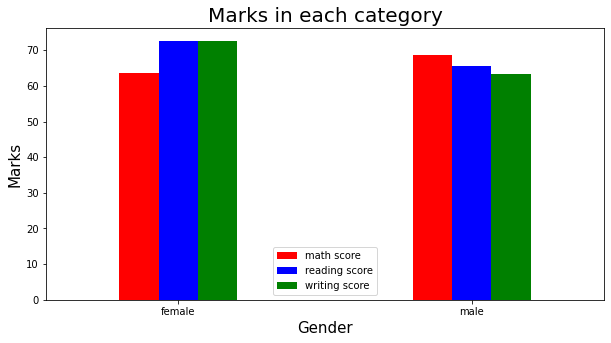

In [17]:
gender.plot(x="gender",
            y=["math score","reading score","writing score"],
            kind="bar",
            color=['red','blue','green'],figsize=(10,5),width=0.4)

plt.xlabel("Gender",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks in each category",size=20)
plt.xticks(rotation=0)
plt.show()

## Race/Ethnicity

In [18]:
race=df.groupby(['race/ethnicity'])[['math score','reading score','writing score']].mean()
race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


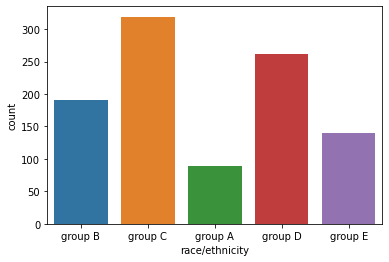

In [19]:
sns.countplot('race/ethnicity',data=df)
plt.show()

In [20]:
race=race.reset_index()
race

,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


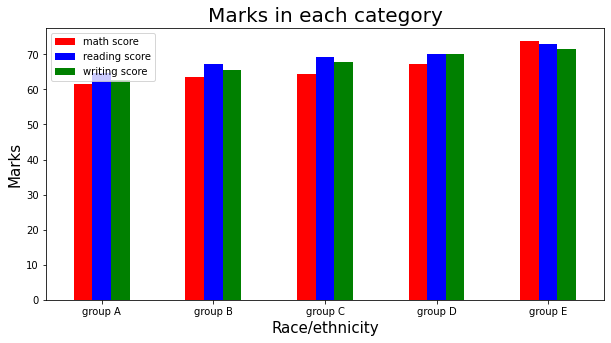

In [21]:
race.plot(x="race/ethnicity",
            y=["math score","reading score","writing score"],
            kind="bar",
            color=['red','blue','green'],figsize=(10,5),width=0.5)

plt.xlabel("Race/ethnicity",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks in each category",size=20)
plt.xticks(rotation=0)
plt.show()

In [22]:
racewithgender=df.groupby(['gender','race/ethnicity'])[['math score','reading score','writing score']].mean()
racewithgender

math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [23]:
racewithgender=racewithgender.reset_index()
racewithgender

,gender,race/ethnicity,math score,reading score,writing score
0,female,group A,58.527778,69.000000,67.861111
1,female,group B,61.403846,71.076923,70.048077
2,female,group C,62.033333,71.944444,71.777778
3,female,group D,65.248062,74.046512,75.023256
4,female,group E,70.811594,75.840580,75.536232
5,male,group A,63.735849,61.735849,59.150943
6,male,group B,65.930233,62.848837,60.220930
7,male,group C,67.611511,65.424460,62.712230
8,male,group D,69.413534,66.135338,65.413534
9,male,group E,76.746479,70.295775,67.394366


In [24]:
male=racewithgender[racewithgender['gender']=='male']
male

,gender,race/ethnicity,math score,reading score,writing score
5,male,group A,63.735849,61.735849,59.150943
6,male,group B,65.930233,62.848837,60.220930
7,male,group C,67.611511,65.424460,62.712230
8,male,group D,69.413534,66.135338,65.413534
9,male,group E,76.746479,70.295775,67.394366


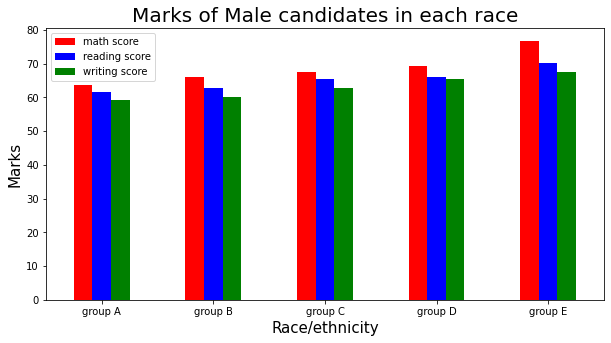

In [25]:
male.plot(x="race/ethnicity",
            y=["math score","reading score","writing score"],
            kind="bar",
            color=['red','blue','green'],figsize=(10,5),width=0.5)

plt.xlabel("Race/ethnicity",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks of Male candidates in each race",size=20)
plt.xticks(rotation=0)
plt.show()

In [26]:
female=racewithgender[racewithgender['gender']=='female']
female

,gender,race/ethnicity,math score,reading score,writing score
0,female,group A,58.527778,69.000000,67.861111
1,female,group B,61.403846,71.076923,70.048077
2,female,group C,62.033333,71.944444,71.777778
3,female,group D,65.248062,74.046512,75.023256
4,female,group E,70.811594,75.840580,75.536232


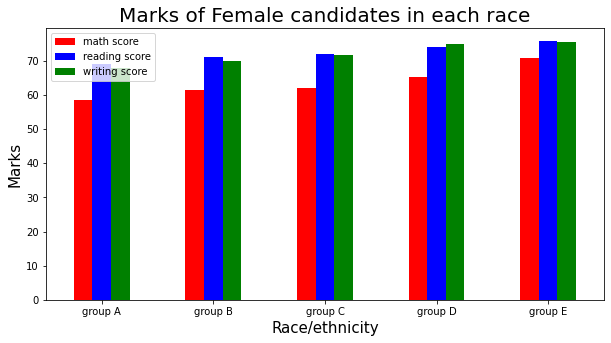

In [27]:
female.plot(x="race/ethnicity",
            y=["math score","reading score","writing score"],
            kind="bar",
            color=['red','blue','green'],figsize=(10,5),width=0.5)

plt.xlabel("Race/ethnicity",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks of Female candidates in each race",size=20)
plt.xticks(rotation=0)
plt.show()

## Parental Level of Education

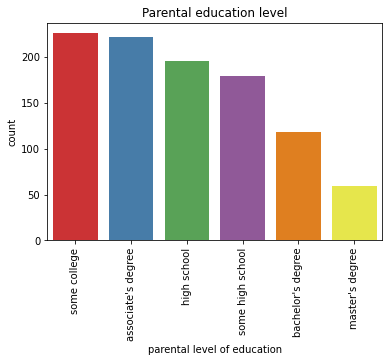

In [28]:
sns.countplot(df['parental level of education'],order=df['parental level of education'].value_counts().index,palette='Set1',orient='h')
plt.xticks(rotation='vertical')
plt.title('Parental education level')
plt.show()

In [29]:
parent_edu_df = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parent_edu_df

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


[]

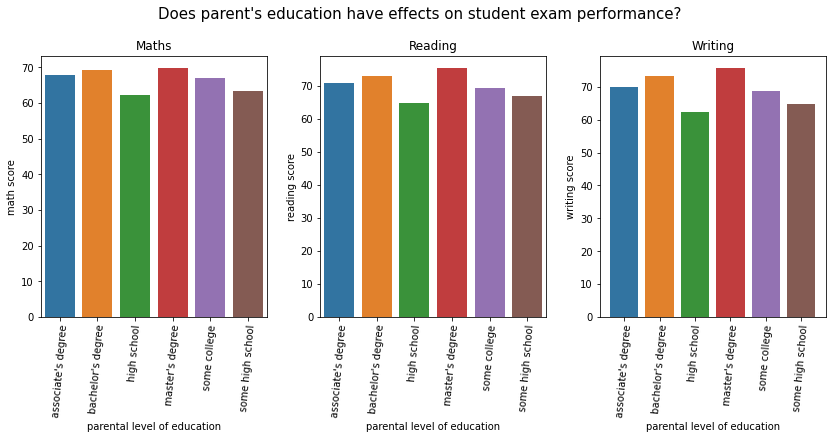

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.xticks(rotation=85)
plt.title('Maths')
sns.barplot(x=parent_edu_df.index, y=parent_edu_df['math score']);

plt.subplot(1, 3, 2)
plt.xticks(rotation=85)
plt.title('Reading')
plt.tight_layout(pad = 2)
sns.barplot(x=parent_edu_df.index, y=parent_edu_df['reading score']);

plt.subplot(1, 3, 3)
plt.xticks(rotation=85)
plt.title('Writing')
plt.tight_layout(pad = 2)
sns.barplot(x=parent_edu_df.index, y=parent_edu_df['writing score']);

plt.suptitle("Does parent's education have effects on student exam performance?",y=1.03,size=15)
plt.plot()

## Lunch

In [31]:
lunch_df = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
lunch_df

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


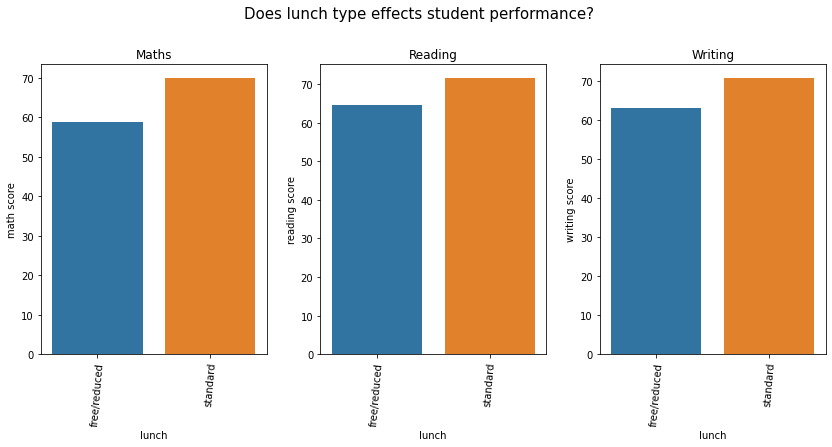

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.xticks(rotation=85)
plt.title('Maths')
sns.barplot(x=lunch_df.index, y=lunch_df['math score']);

plt.subplot(1, 3, 2)
plt.xticks(rotation=85)
plt.title('Reading')
plt.tight_layout(pad = 2)
sns.barplot(x=lunch_df.index, y=lunch_df['reading score']);

plt.subplot(1, 3, 3)
plt.xticks(rotation=85)
plt.title('Writing')
plt.tight_layout(pad = 2)
sns.barplot(x=lunch_df.index, y=lunch_df['writing score']);

plt.suptitle("Does lunch type effects student performance?",y=1.05,size=15)
plt.show()

## Test Preparation Course

In [33]:
test_df = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
test_df

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


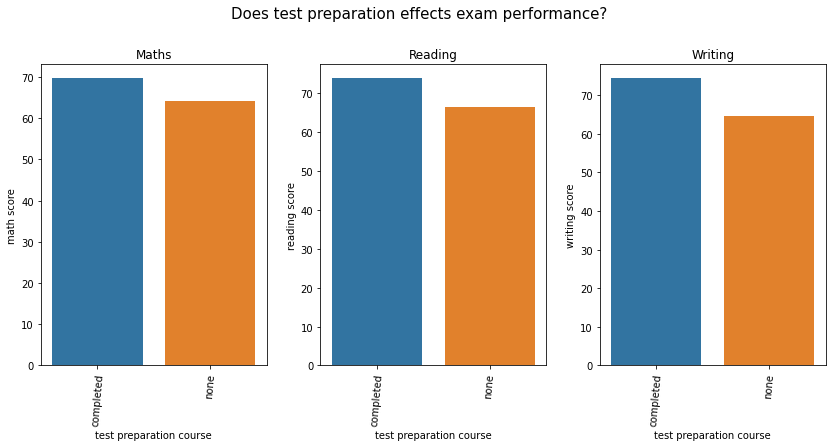

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.xticks(rotation=85)
plt.title('Maths')
sns.barplot(x=test_df.index, y=test_df['math score']);

plt.subplot(1, 3, 2)
plt.xticks(rotation=85)
plt.title('Reading')
plt.tight_layout(pad = 2)
sns.barplot(x=test_df.index, y=test_df['reading score']);

plt.subplot(1, 3, 3)
plt.xticks(rotation=85)
plt.title('Writing')
plt.tight_layout(pad = 2)
sns.barplot(x=test_df.index, y=test_df['writing score']);

plt.suptitle("Does test preparation effects exam performance?",y=1.05,size=15)
plt.show()

In [35]:
df['total marks']=df['math score']+df['reading score']+df['writing score']
df['percentage']=df['total marks']/300*100

In [36]:
def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)

In [37]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Grade B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Grade B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Grade A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Grade D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Grade B
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Grade A
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Grade C
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Grade C
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Grade B


In [38]:
final=df['grades'].value_counts()
final

Grade C    350
Grade B    343
Grade D    173
Grade A    116
Grade E     18
Name: grades, dtype: int64

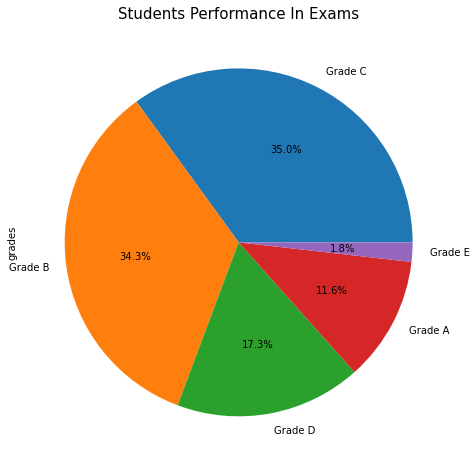

In [39]:
figure = plt.figure(figsize=(8,8))
final.plot.pie(autopct="%1.1f%%")
plt.title('Students Performance In Exams',size=15,y=1)
plt.show()

## Conclusion
 - Since all the marks are out of 100, the mean values are the percentage values as well
 - Male students perform better in maths exam while female students are good at reading and writing
 - Ethnicity group E performs best in exams and A performs the worst of all
 - Students who have educated parents perform well. Higher the educated parents, higher the students perform
 - Students who have standard lunch perform well as compared to those who get free or reduced lunch
 - Students who prepare for the exams perform better

In summary, if students want to perform good in exams, they should have enough nutrient, parents support and make efforts to prepare for the tests<br/>